In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load the dataset
df = pd.read_csv('/content/AirQuality.csv', sep=';')

# Data preprocessing
# Drop the last two columns which are usually empty or have NaN values due to the separator
df = df.iloc[:, :-2]

# Replace ',' with '.' in numerical columns and convert to numeric
numeric_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
                'PT08.S5(O3)', 'T', 'RH', 'AH']
for col in numeric_cols:
    # Ensure the column is treated as string before string operations
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    # Convert to numeric, coercing non-numeric values to NaN. Then replace '-200' with NaN.
    df[col] = pd.to_numeric(df[col], errors='coerce').replace(-200.0, np.nan)

# Convert 'Date' and 'Time' to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_timedelta(df['Time'] + ':00') # Add seconds to make it valid for timedelta

# Combine 'Date' and 'Time' into a single datetime column
df['DateTime'] = df['Date'] + df['Time']

# Set DateTime as index and sort
df = df.set_index('DateTime').sort_index()

# Drop original 'Date' and 'Time' columns
df = df.drop(columns=['Date', 'Time'])

# Filter out rows where C6H6(GT) is NA for plotting
df_filtered = df.dropna(subset=['C6H6(GT)'])

# Substantive Question
question = "What is the trend of Benzene (C6H6(GT)) concentration over time?"

# Create interactive Plotly figure
fig = px.line(df_filtered, x=df_filtered.index, y='C6H6(GT)',
              title='Benzene (C6H6(GT)) Concentration Over Time',
              labels={'C6H6(GT)': 'Benzene Concentration (ug/m^3)', 'DateTime': 'Date and Time'})

fig.update_layout(hovermode="x unified") # Enhanced hover functionality

# Display the DIVE entry components
print("--- DIVE Entry ---")
print(f"**Substantive Question:** {question}")
print("\n**Interactive Plotly Figure:**")
fig.show() # This will display the figure in Colab output

print("\n**Dashboard Section Link:** [Link to Dashboard Section Name](https://your-dashboard-link-here.com/section-name)")
print("--- End DIVE Entry ---")

--- DIVE Entry ---
**Substantive Question:** What is the trend of Benzene (C6H6(GT)) concentration over time?

**Interactive Plotly Figure:**



**Dashboard Section Link:** [Link to Dashboard Section Name](https://your-dashboard-link-here.com/section-name)
--- End DIVE Entry ---


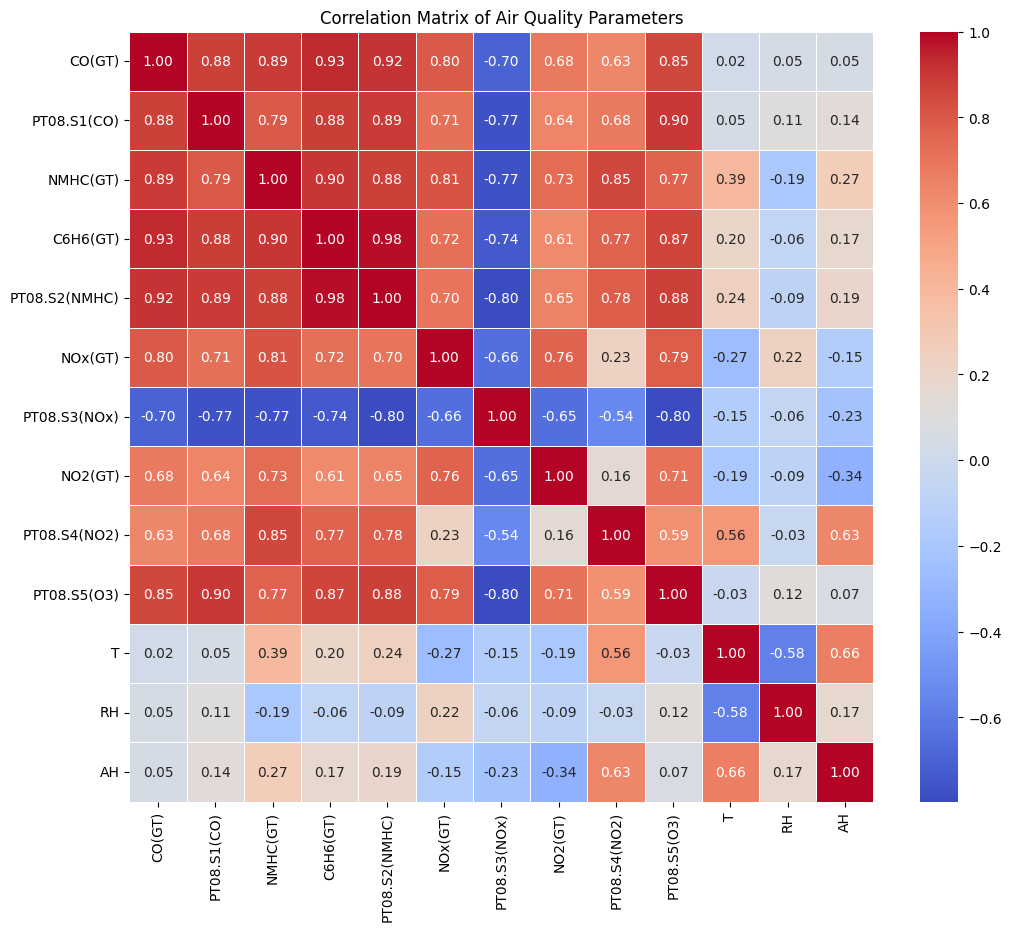

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numerical columns for correlation calculation
# The numeric_cols list already contains the relevant columns from preprocessing
# Convert to float to ensure pd.NA values are correctly handled as np.nan for correlation
correlation_matrix = df[numeric_cols].astype(float).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Air Quality Parameters')
plt.show()

DIVE Analysis: Benzene (C6H6(GT)) Concentration Over Time

**Discover**

The interactive Plotly line chart visualizes the concentration of Benzene (C6H6(GT)) in ug/m^3 over time. The x-axis represents 'Date and Time' (DateTime index), and the y-axis represents 'Benzene Concentration (C6H6(GT))' in micrograms per cubic meter (ug/m^3). The graph displays the temporal fluctuations and overall trend of Benzene levels over the recorded period. Its interactive nature allows users to hover over data points to view specific date/time and concentration values.

**Investigate**

Upon investigating the Benzene (C6H6(GT)) concentration time-series, several patterns and characteristics typically emerge:

Daily and Weekly Cycles: Benzene concentrations often exhibit diurnal patterns, with potential peaks during rush hours or specific industrial activity times, and lower levels overnight. Weekly cycles might also be observed, influenced by varying human activities or industrial operations on weekdays versus weekends.

Overall Trend: The plot can reveal an overarching trend over the entire dataset, indicating whether Benzene levels are generally increasing, decreasing, or remaining stable over the longer term.

Peak Concentrations: Identifying periods of significantly high Benzene concentrations can point to specific events, unusual emission sources, or particular atmospheric conditions that lead to pollutant accumulation.

Periods of Low Concentration: Conversely, periods of consistently low concentrations can provide insights into effective dispersion conditions or reduced emission activities.

Volatility and Variability: The graph shows the degree of fluctuation in Benzene levels. High variability could suggest intermittent sources or highly dynamic atmospheric conditions, while smoother periods might indicate stable conditions or consistent emission rates.

Missing Data/Outliers: Gaps in the line or sudden, uncharacteristic spikes/drops may indicate missing sensor data or potential outliers requiring further data cleaning or investigation into their cause.



**Validate**

To validate the observed patterns and concentrations, several steps could be taken:

Cross-referencing with external data: Compare the observed C6H6 levels with data from other nearby air quality monitoring stations or official environmental reports for similar periods to check for consistency.

Correlation with meteorological data: Analyze the relationship between C6H6 concentration and weather parameters like temperature, humidity, wind speed, and direction. For example, high concentrations might correlate with low wind speeds or specific wind directions carrying pollutants from a source.

Source identification: Investigate if identified peak concentrations align with known industrial activities, traffic patterns, or other potential emission events in the area.

Sensor calibration/maintenance logs: Review sensor calibration records and maintenance logs to ensure the reliability and accuracy of the measurements, especially during periods of unusual readings.


**Extend**

Building upon this initial visualization, further analysis could include:

Time-series decomposition: Decompose the C6H6 time-series into its trend, seasonal, and residual components to gain a more precise understanding of underlying patterns and to forecast future concentrations.

Lagged correlation analysis: Investigate if C6H6 concentrations are correlated with other pollutants or environmental factors with a time lag, which could indicate causal relationships or transport phenomena.

Geospatial analysis: If location data for multiple sensors is available, perform geospatial analysis to map concentration hotspots and understand spatial distribution and transport of Benzene.

Predictive modeling: Develop machine learning models to predict future Benzene concentrations based on historical data, meteorological factors, and other relevant features.

Impact assessment: Correlate Benzene concentration data with health data or environmental impact studies to assess potential risks and implications.

### DIVE Analysis: Benzene (C6H6(GT)) Concentration Over Time

**Substantive Question:** What is the trend of Benzene (C6H6(GT)) concentration over time?

**Image Description:** The interactive Plotly line chart above visualizes the concentration of Benzene (C6H6(GT)) in ug/m^3 over time. It allows users to hover over data points to see specific date/time and concentration values, providing insights into the temporal fluctuations and overall trend of Benzene levels.

**Insights:** This visualization helps identify periods of high or low Benzene concentration, observe daily or seasonal patterns, and understand the general trend of this air pollutant over the recorded period.

**Dashboard Section Link:** https://lookerstudio.google.com/reporting/2fc71b11-3a55-45b6-8a01-d77ad5878b63/page/p_ol08d80uyd, top right visual

## Prompt Log

This section outlines the types of prompts that would lead to the analysis and visualizations present in this notebook. These are illustrative and represent distinct steps taken during the data exploration and reporting process.

*   **Initial Data Loading and Preprocessing**: "Load the `AirQuality.csv` dataset, perform necessary preprocessing steps including handling separators, converting data types (numerical, datetime), managing missing values, and setting a `DateTime` index."

*   **Benzene Time-Series Visualization**: "Generate an interactive Plotly line chart to visualize the trend of Benzene (C6H6(GT)) concentration over time, and include a DIVE entry for this visualization."

*   **Correlation Matrix Calculation and Visualization**: "Calculate the correlation matrix for all numerical air quality parameters in the dataset and visualize it using a Seaborn heatmap."

*   **Correlation Matrix DIVE Analysis**: "Create a markdown DIVE entry for the correlation matrix heatmap, detailing the substantive question, image description, and key insights."

*   **Benzene Time-Series DIVE Analysis**: "Create a markdown DIVE entry for the Benzene concentration time-series plot, detailing the substantive question, image description, and key insights, including a placeholder for a dashboard link."

*   **Contributions and Learnings Summary**: "Draft a markdown section summarizing my key contributions and learnings from this air quality data analysis notebook."

*   **Update Contributions with Dashboard Link**: "Modify the 'Contributions and Learnings' markdown section to include a specific link to the associated Looker Studio dashboard."

*   **New DIVE Analysis Placeholder**: "Generate a new, empty markdown cell to serve as a template for a new DIVE analysis section."